<h1 style='color: green; font-size: 36px; font-weight: bold;'>Projeto de Regressão Linear</h1>


## **Dataset**
<hr>

**Fonte:** https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### **Objetivo**

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### **Dados:**
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

# <font color='red' style='font-size: 30px;'>Análise Exploratória</font>
<hr style='border: 2px solid red;'>

**Objetivo notebook**

O objetivo desse notebook é conhecer e explorar os dados.

## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

## Leitura dos dados

In [2]:
dados = pd.read_csv('../Data/raw/Consumo_cerveja.csv', sep=';')
dados.head(5)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [3]:
dados.shape

(365, 7)

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   data        365 non-null    object 
 1   temp_media  365 non-null    float64
 2   temp_min    365 non-null    float64
 3   temp_max    365 non-null    float64
 4   chuva       365 non-null    float64
 5   fds         365 non-null    int64  
 6   consumo     365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [5]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de correlação

<p style="font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;">
  O <strong>coeficiente de correlação</strong> é uma medida de associação linear entre duas variáveis e situa-se entre <strong>-1</strong> e <strong>+1</strong>, sendo que <strong>-1</strong> indica associação negativa perfeita e <strong>+1</strong> indica associação positiva perfeita.
</p>


In [6]:
correlation = dados[['temp_media', 'temp_min', 'temp_max', 'chuva','fds','consumo']].corr().round(2)
correlation

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.00,0.86,0.92,0.02,-0.05,0.57
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64
chuva,0.02,0.10,-0.05,1.00,0.00,-0.19
fds,-0.05,-0.06,-0.04,0.00,1.00,0.51
consumo,0.57,0.39,0.64,-0.19,0.51,1.00


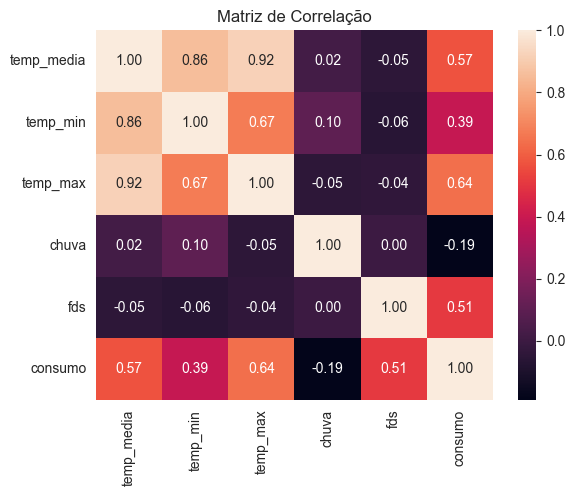

In [7]:
# plot da matriz de correlação

sns.heatmap(correlation, annot = True, fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)

In [8]:
dados.head(5)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


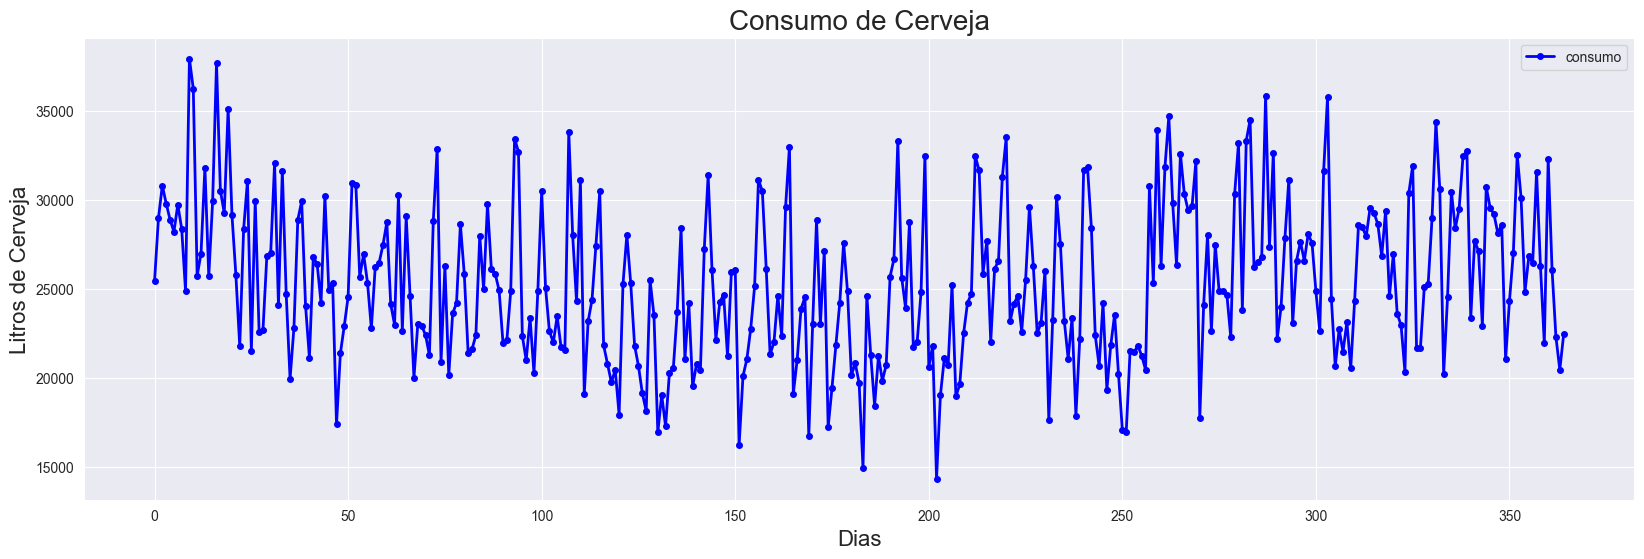

In [9]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros de Cerveja', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)

dados.plot(y='consumo', kind='line', ax=ax, color='blue', linewidth=2, marker='o', markersize=4)
plt.show()
# Alternative way to plot the same data
# ax = dados['consumo'].plot(color='blue', linewidth=2, linestyle='-', marker='o', markersize=4)
# ax.plot(dados['consumo'], color='blue', linewidth=2, linestyle='-', marker='o', markersize=4)

# Plotting simple line plot
# dados.plot(y='consumo', x = 'data')
# dados['consumo'].plot()

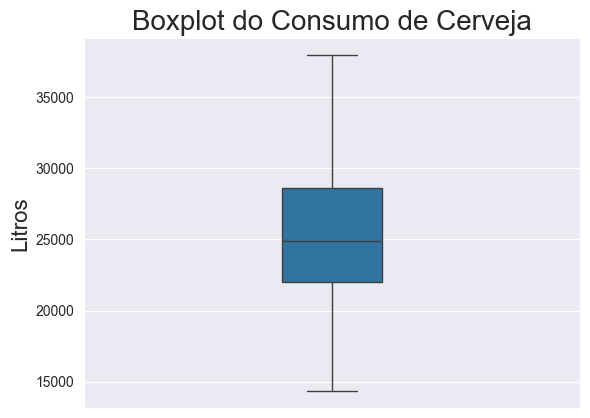

In [10]:
fig, ax = plt.subplots()
ax.set_title('Boxplot do Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
sns.boxplot(dados['consumo'], orient='v', width=0.2, ax=ax)
plt.show()

# Another way to plot the boxplot
# sns.boxplot(y=dados['consumo'], width=0.2) # Equivalente a orient='v'
# sns.boxplot(x=dados['consumo'], width=0.2) # Equivalente a orient='h'

## Investigando a variável *dependente* (y) segundo determinada característica

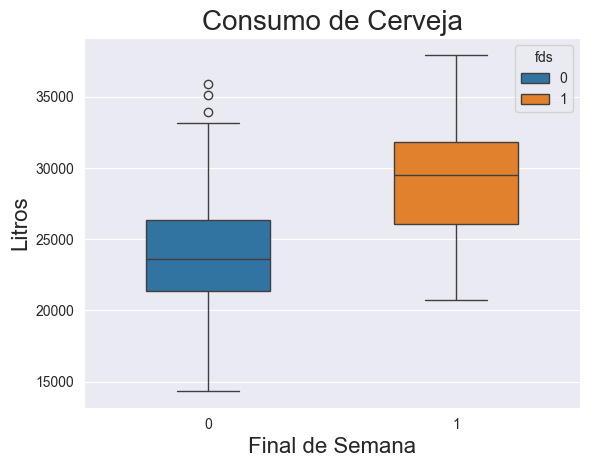

In [11]:
fig, ax = plt.subplots()
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
sns.boxplot(y='consumo', x = 'fds',data=dados, ax = ax, width=0.5, hue='fds')
plt.show()

## Distribuição de frequências da variável *dependente* (y)

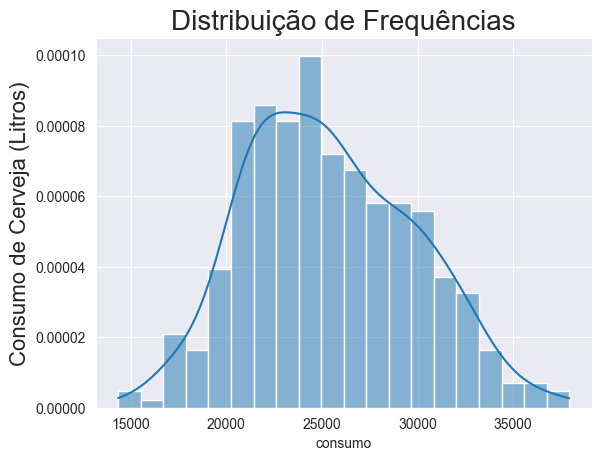

In [12]:
fig, ax = plt.subplots()
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja (Litros)', fontsize=16)

sns.histplot(dados['consumo'], kde=True, stat='density', bins = 20, ax=ax)
plt.show()
# ax = sns.distplot(dados['consumo'])


# <font color='red' style='font-size: 30px;'>Gráficos de dispersão: Variável Dependente X Variáveis Explicativas</font>
<hr style='border: 2px solid red;'>

- `seaborn.pairplot`
- `seaborn.jointplot`
- `seaborn.lmplot`

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

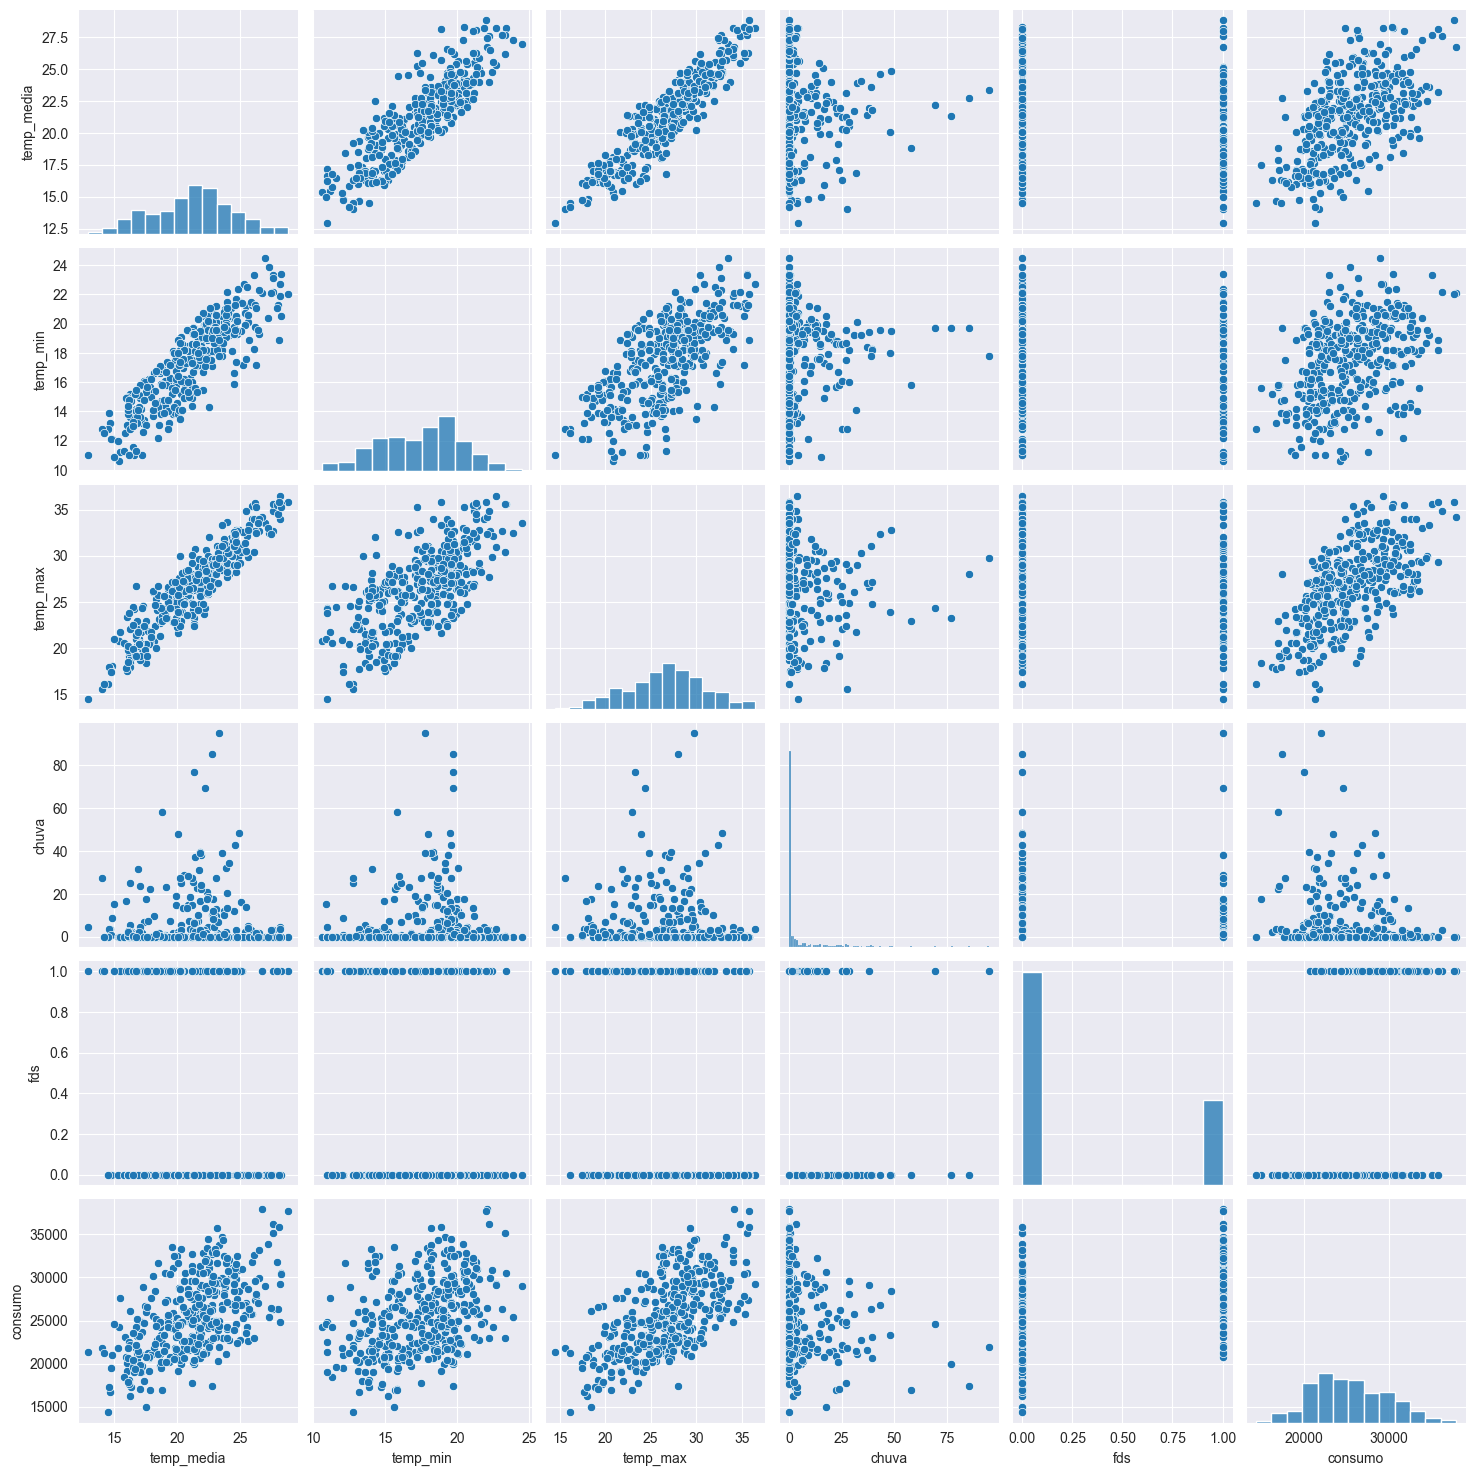

In [13]:
sns.pairplot(dados)
plt.show()

## Plotando o pairplot fixando somente uma variável no eixo y

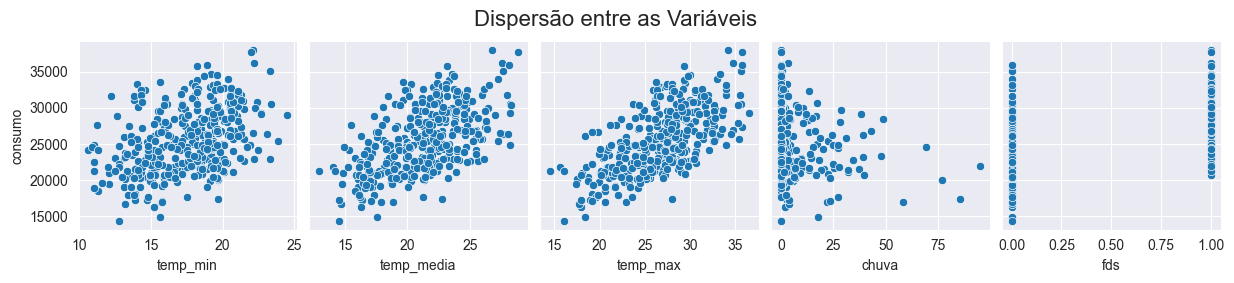

In [14]:
# A função sns.pairplot não funciona com ax=ax
sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'])
plt.suptitle('Dispersão entre as Variáveis', fontsize=16, y=1.09)
plt.show()

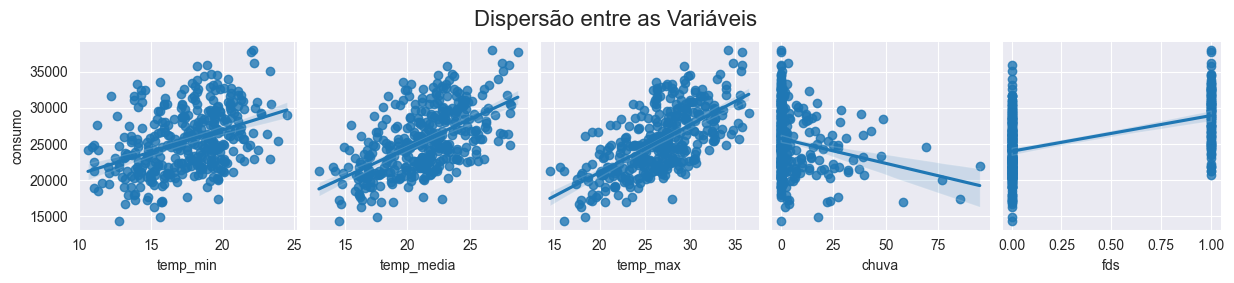

In [15]:
# A função sns.pairplot não funciona com ax=ax
sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva', 'fds'], kind='reg')
plt.suptitle('Dispersão entre as Variáveis', fontsize=16, y=1.09)
plt.show()

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>


**Explicação:**
- `sns.jointplot` retorna um **`JointGrid`**, não um **Figure** ou **Axes** padrão.
- Para personalizar os eixos, você precisa acessar **g.ax_joint**.
- **plt.xlabel(...)** não funciona nesse caso, pois o gráfico principal é controlado por **g.ax_joint**.

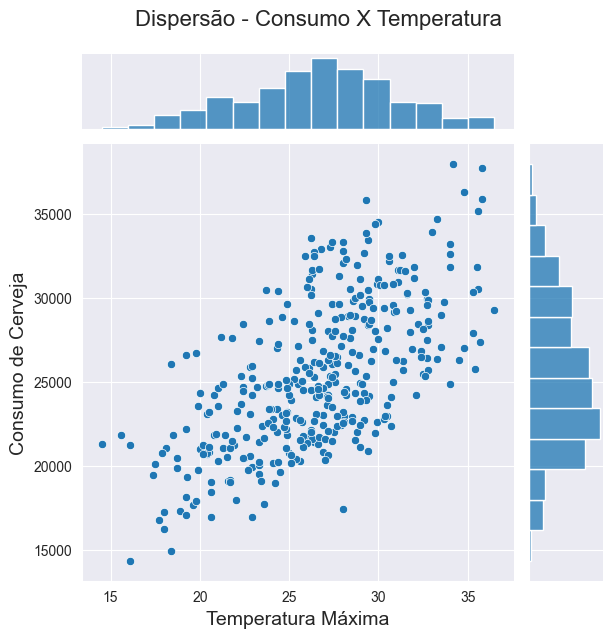

In [16]:
g = sns.jointplot(x='temp_max', y='consumo', data=dados)
plt.suptitle('Dispersão - Consumo X Temperatura', fontsize=16, y=1.05) # Define o título principal do gráfico

# Define rótulos dos eixos (precisa acessar os eixos diretamente)
g.ax_joint.set_xlabel("Temperatura Máxima", fontsize=14)
g.ax_joint.set_ylabel("Consumo de Cerveja", fontsize=14)
plt.show()

## Plotando um jointplot com a reta de regressão estimada

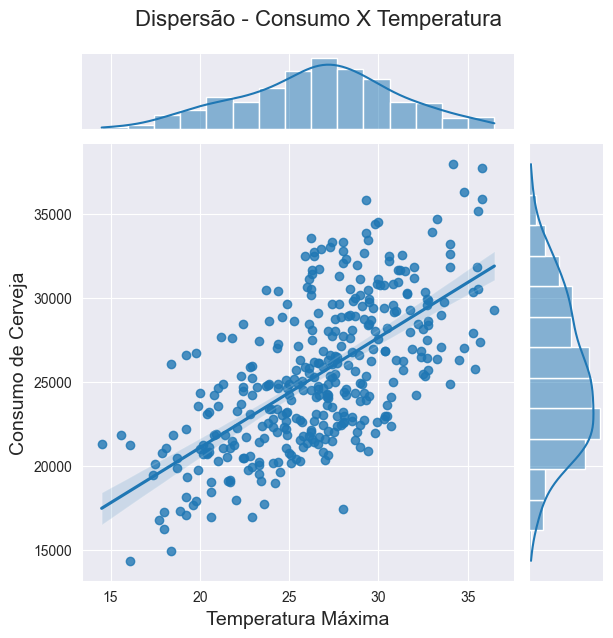

In [17]:
g = sns.jointplot(x='temp_max', y='consumo', data=dados, kind='reg')
plt.suptitle('Dispersão - Consumo X Temperatura', fontsize=16, y=1.05) # Define o título principal do gráfico

# Define rótulos dos eixos (precisa acessar os eixos diretamente)
g.ax_joint.set_xlabel("Temperatura Máxima", fontsize=14)
g.ax_joint.set_ylabel("Consumo de Cerveja", fontsize=14)
plt.show()

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>


- `sns.jointplot` retorna um **`FacetGrid`**

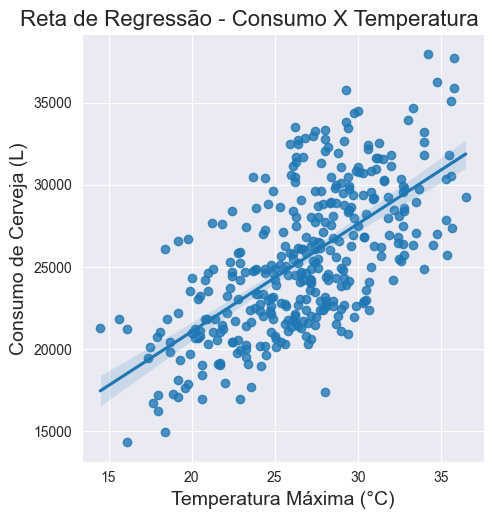

In [18]:
g = sns.lmplot(x="temp_max", y="consumo", data=dados)
plt.suptitle('Reta de Regressão - Consumo X Temperatura', fontsize=16, y=1.02) # Define o título principal do gráfico

# Define os rótulos dos eixos (acessando o Axes principal do FacetGrid)
g.set_axis_labels("Temperatura Máxima (°C)", "Consumo de Cerveja (L)", fontsize=14)
plt.show()

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

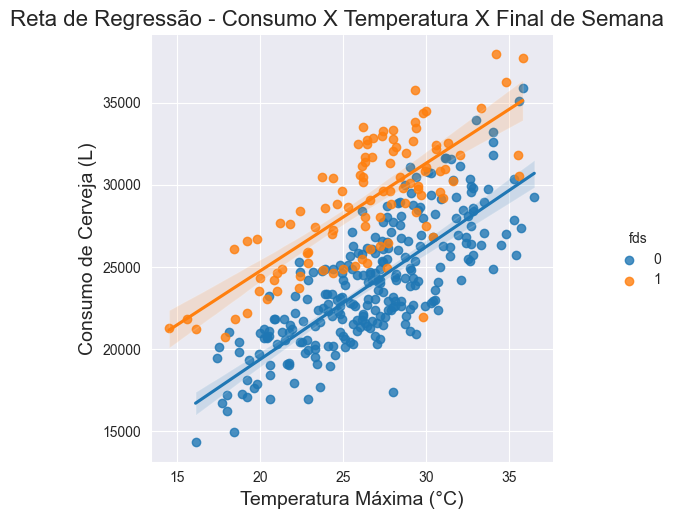

In [19]:
g = sns.lmplot(x="temp_max", y="consumo", data=dados, hue='fds')
plt.suptitle('Reta de Regressão - Consumo X Temperatura X Final de Semana', fontsize=16, y=1.02) # Define o título principal do gráfico

# Define os rótulos dos eixos (acessando o Axes principal do FacetGrid)
g.set_axis_labels("Temperatura Máxima (°C)", "Consumo de Cerveja (L)", fontsize=14)
plt.show()

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

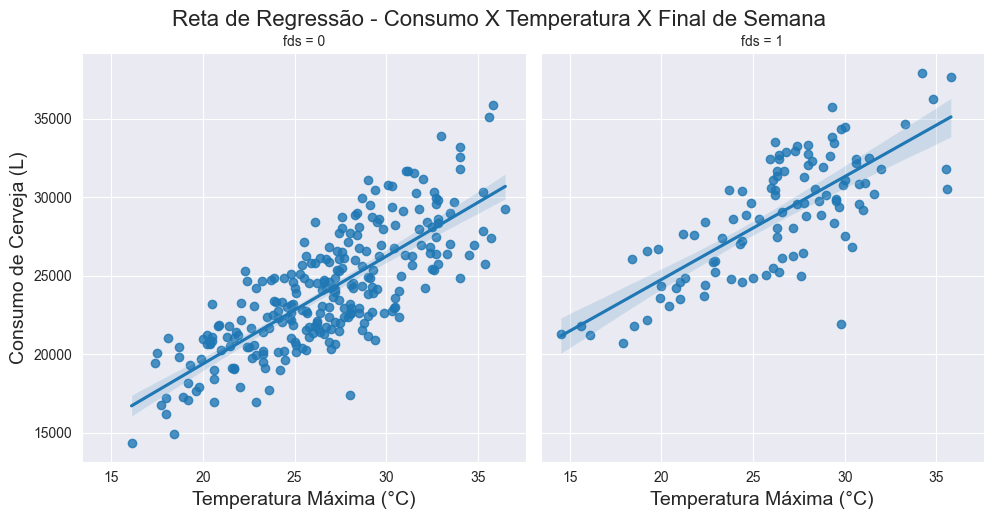

In [20]:
g = sns.lmplot(x="temp_max", y="consumo", data=dados, col='fds')
plt.suptitle('Reta de Regressão - Consumo X Temperatura X Final de Semana', fontsize=16, y=1.02) # Define o título principal do gráfico

# Define os rótulos dos eixos (acessando o Axes principal do FacetGrid)
g.set_axis_labels("Temperatura Máxima (°C)", "Consumo de Cerveja (L)", fontsize=14)
plt.show()